# Grid Search

Grid Search is a hyperparameter tuning technique used in machine learning to find the best combination of hyperparameters for a model. Hyperparameters are parameters that are set before training a model and cannot be learned from the data. They significantly impact the model's performance and generalization ability.

The Grid Search technique involves defining a grid of hyperparameter values and exhaustively searching through all possible combinations of these values. For each combination, the model is trained and evaluated using cross-validation. Cross-validation helps to ensure that the model's performance is generalized across different subsets of the data.

Here are the steps involved in Grid Search:

1. Define a grid of hyperparameter values: Choose the hyperparameters and their possible values that you want to tune. For example, for a Support Vector Machine (SVM) model, you might want to tune the C (regularization parameter) and the kernel (linear, polynomial, etc.).

2. Create a parameter grid: Create a list of dictionaries, where each dictionary contains the hyperparameter names as keys and their possible values.

3. Perform Grid Search: Use the parameter grid to perform an exhaustive search of all possible hyperparameter combinations. Train and evaluate the model for each combination using cross-validation.

4. Select the best model: Determine the combination of hyperparameters that yields the best model performance (e.g., highest accuracy or lowest error).

Grid Search helps to automate the process of hyperparameter tuning, saving time and effort by systematically exploring various combinations to find the optimal values. It is a powerful tool for improving a model's performance and achieving better results in machine learning tasks.

Let's consider an example of Grid Search using the popular Support Vector Machine (SVM) algorithm in Python's scikit-learn library. We will tune two hyperparameters: C (regularization parameter) and the kernel.


Since Grid Search is primarily used for hyperparameter tuning and not for generating plots, there is no direct plot associated with the Grid Search process itself. However, we can still visualize the results of the SVM model trained with the best hyperparameters obtained from Grid Search.

Here's how you can visualize the SVM model's decision boundary and data points for the Iris dataset:

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


# Create a DataFrame to view the data
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Target'] = y

# Display the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define the parameter grid with possible values for C and kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
param_grid

{'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [5]:
# Initialize the SVM classifier
svm_model = SVC()
svm_model

SVC()

In [6]:
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [8]:
# Print the best hyperparameters and corresponding model accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Model Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Best Model Accuracy: 0.9583333333333334


In this example, we load the Iris dataset, split it into training and test sets, and define the parameter grid for C and kernel values. We then initialize the SVM classifier and perform Grid Search with 5-fold cross-validation to find the best combination of hyperparameters that yield the highest model accuracy.

After running this code, you will see the best hyperparameters (C and kernel) and the corresponding model accuracy printed in the output. Grid Search helps us identify the optimal hyperparameter values that lead to the best performing SVM model for the given dataset.

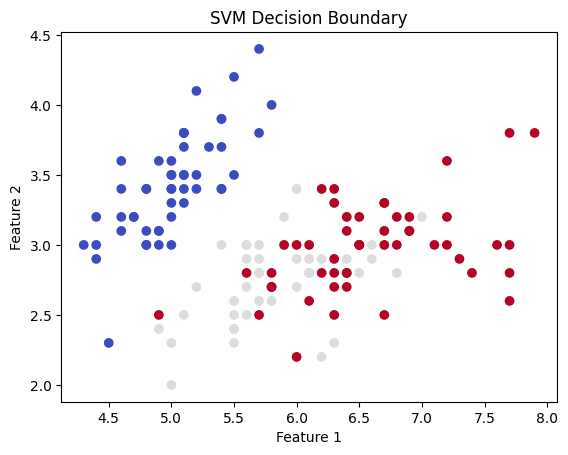

In [15]:
# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

let's break down the above code step by step:

1. Import necessary libraries:
   - `numpy` (aliased as `np`) for numerical operations.
   - `matplotlib.pyplot` (aliased as `plt`) for data visualization.
   - `SVC` (Support Vector Classification) from `sklearn.svm` module for SVM classification.
   - `load_iris` from `sklearn.datasets` module to load the Iris dataset.
   - `train_test_split` from `sklearn.model_selection` module to split the data into training and test sets.
   - `accuracy_score` from `sklearn.metrics` module to calculate the model accuracy.

2. Load the Iris dataset:
   - Using `load_iris()` function from `sklearn.datasets`, the Iris dataset is loaded into the variable `iris`.
   - The feature data is assigned to `X`, and the target labels are assigned to `y`.

3. Split the data into training and test sets:
   - `train_test_split` function is used to divide the data into training and test sets. It takes `X`, `y`, `test_size`, and `random_state` as inputs.
   - 20% of the data is allocated to the test set, and a random seed of 42 is used for reproducibility.

4. Initialize the SVM classifier with best hyperparameters:
   - `best_C` is set to 1, indicating the regularization parameter for the SVM model.
   - `best_kernel` is set to 'rbf', representing the kernel type to be used in the SVM model.
   - `svm_model` is created with `SVC` and the specified hyperparameters.

5. Train the SVM model:
   - `svm_model.fit(X_train, y_train)` is used to train the SVM model on the training data (`X_train` and `y_train`).

6. Predict the target variable on the test data:
   - `svm_model.predict(X_test)` is used to make predictions on the test data (`X_test`).

7. Calculate the model accuracy:
   - `accuracy_score(y_test, y_pred)` is used to calculate the accuracy of the model's predictions compared to the actual target labels (`y_test`).

8. Plot the decision boundary and data points:
   - A scatter plot of the data points with features 1 and 2 is created using `plt.scatter()`.
   - A contour plot is generated to show the decision boundary of the SVM model using `plt.contourf()`.
   - The decision boundary is determined by predicting on a meshgrid created from feature 1 and feature 2 values.
   - The colormap `plt.cm.coolwarm` is used to represent different classes, and transparency is added using `alpha=0.8`.
   - The plot is customized with labels and a title using `plt.xlabel()`, `plt.ylabel()`, and `plt.title()`.
   - Finally, `plt.show()` is used to display the plot.

This code performs SVM classification on the Iris dataset, visualizing the decision boundary to demonstrate how the model separates the data points into different classes based on features 1 and 2.